In [39]:
import os
import sys

BASE_DIR = os.getcwd()
print(BASE_DIR)
module_path = os.path.join(BASE_DIR)
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)


from gan.discriminator import MultiLabelDiscriminator
from gan.gan import Gan
from gan.generator import BaseGenerator
from loguru import logger
import tensorflow as tf
import numpy as np
from dotenv import load_dotenv
from rimworld.utils import *
import librosa


load_dotenv()

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

DEBUG_MODE = False
# create .env in root folder, for example:
# ROOT_FOLDER=D:\Projects\nsynth-data\data\stft
# TEST_SOUNDS_FOLDER = D:\Projects\nsynth-data\data\nsynth-test\audio
ROOT_FOLDER = os.getenv('ROOT_FOLDER')
TEST_SOUNDS_FOLDER = os.getenv('TEST_SOUNDS_FOLDER')


if DEBUG_MODE:
    print(ROOT_FOLDER)
# LABEL = 'instrument_subtype'
LABEL_ID = 'instrument_and_pitch_single_label'
BATCH_SIZE =32
EPOCHS = 200

generator_description = "last_day_of_may"

DEBUG_MODE = True

if DEBUG_MODE:
    logger.warning("WARNING WARNING DEBUG MODE IS ON WARNING WARNING")

waves = ["bass_electronic_018-030-050.wav.png",
         "organ_electronic_007-030-050.wav.png",
         "string_acoustic_071-030-127.wav.png",
         "vocal_acoustic_000-030-100.wav.png"]
test_samples = []
for wave in waves:
    test_samples.append(os.path.join(TEST_SOUNDS_FOLDER, wave))

test_labels = []
for sample_name in waves:
    test_labels.append(np.argmax(np.array(get_label(sample_name, LABEL_ID, label_shapes[LABEL_ID]))))

2021-06-01 16:06:51.365 | WARNING  | __main__:<module>:47 - WARNING WARNING DEBUG MODE IS ON WARNING WARNING


D:\Projects\rimworld-of-sound
D:\Projects\rimworld-of-sound


In [32]:
print(test_labels)

[21, 133, 245, 357]


In [33]:
m = Gan.from_file("models/gan_00195.h5", 560,560)


In [38]:
import IPython as ipython
generated = m.generate(test_labels, False, False)
wave = reconstruct_from_sliding_spectrum(generated[0, :, :, 0])
sr=16000
ipython.display.Audio(wave, rate=sr)

(126, 1025, 1)


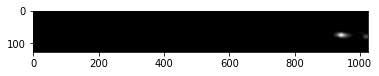

In [46]:
print(generated[0].shape)
import matplotlib.pyplot as plt
spectrograms = m.generate(test_labels, False, True)
import soundfile as sf

for idx, s in enumerate(spectrograms):
    plt.imshow(s, cmap='gray')
    plt.savefig(f'sounds\{waves[idx][:-8]}.png')

sr=16000
for idx in range(len(waves)):
    s = reconstruct_from_sliding_spectrum(generated[idx, :, :, 0])
    sf.write(f'sounds\{waves[idx][:-8]}.wav', s, sr) 


In [12]:
print(generated.reshape(4,126,1025))

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
